# OGR

## Prerequisits

### Is geopandas installed

In [65]:
import sys, os
try:
    import geopandas as gpd
    print("Installed!")
except:
    sys.exit('ERROR: cannot find geopandas')

Installed!


## Visualization of vector data

In [66]:

import os
import matplotlib.pyplot as plt
from osgeo import ogr

# This is the function from listing 11.2.
def plot_polygon(poly, symbol='k-', fig=None, ax=None, fill=False, **kwargs):
    """Plots a polygon using the given symbol."""
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    
    if not fill:
        for i in range(poly.GetGeometryCount()):
            subgeom = poly.GetGeometryRef(i)
            x, y = zip(*subgeom.GetPoints())
            ax.plot(x, y, symbol, **kwargs)
    else:
        for i in range(poly.GetGeometryCount()):
            x, y = zip(*poly.GetGeometryRef(i).GetPoints())
            plt.fill(x, y, symbol, **kwargs)


# Use this function to fill polygons (shown shortly after
# this listing in the text). Uncomment this one and comment
# out the one above.
# def plot_polygon(poly, symbol='w', **kwargs):
#     """Plots a polygon using the given symbol."""
#     for i in range(poly.GetGeometryCount()):
#         x, y = zip(*poly.GetGeometryRef(i).GetPoints())
#         plt.fill(x, y, symbol, **kwargs)


# This function is new.
def plot_line(line, symbol='k-', fig=None, ax=None, fill=False, **kwargs):
    """Plots a line using the given symbol."""
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    
    x, y = zip(*line.GetPoints())
    ax.plot(x, y, symbol, **kwargs)

# This function is new.
def plot_point(point, fig=None, ax=None, symbol='ko', **kwargs):
    """Plots a point using the given symbol."""
    
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

    x, y = point.GetX(), point.GetY()
    ax.plot(x, y, symbol, **kwargs)


def plot_feature(feature, symbol, fig=None, ax=None, fill=False, **kwargs):
    """Plots an OGR feature using the given symbol."""

    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

    geom = feature.geometry()
    geom_type = geom.GetGeometryType()

    # Polygons
    if geom_type == ogr.wkbPolygon:
        plot_polygon(geom, symbol, fig=fig, ax=ax, fill=fill, **kwargs)

    # Multipolygons
    elif geom_type == ogr.wkbMultiPolygon:
        for i in range(geom.GetGeometryCount()):
            subgeom = geom.GetGeometryRef(i)
            plot_polygon(subgeom, symbol, fig=fig, ax=ax, fill=fill, **kwargs)

    # Lines
    elif geom_type == ogr.wkbLineString:
        plot_line(geom, symbol, fig=fig, ax=ax, **kwargs)

    # Multilines
    elif geom_type == ogr.wkbMultiLineString:
        for i in range(geom.GetGeometryCount()):
            subgeom = geom.GetGeometryRef(i)
            plot_line(subgeom, symbol, fig=fig, ax=ax, **kwargs)

    # Points
    elif geom_type == ogr.wkbPoint:
        plot_point(geom, symbol, fig=fig, ax=ax, **kwargs)

    # Multipoints
    elif geom_type == ogr.wkbMultiPoint:
        for i in range(geom.GetGeometryCount()):
            subgeom = geom.GetGeometryRef(i)
            plot_point(subgeom, symbol, fig=fig, ax=ax, **kwargs)

def plot_layer(layer, symbol, fig=None, ax=None, **kwargs):
    """Plots an OGR layer using the given symbol."""
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    for feature in layer:
        plot_feature(feature, symbol, fig, ax, kwargs)

        

## Datasource

### How to open a vector datasource

In [67]:
dir = 'data/Vector'
datasource_path = os.path.join(dir, "NL_provinces.shp")
datasource_path

'data/Vector/NL_provinces.shp'

<AxesSubplot: >

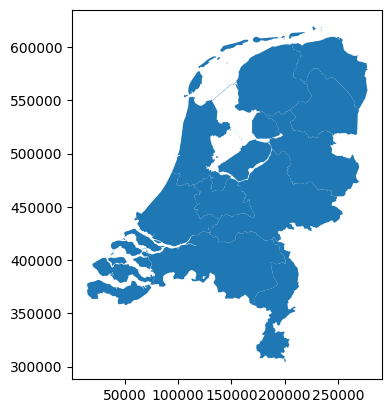

In [68]:
import os

gdf_nl_prov = gpd.read_file(datasource_path)
gdf_nl_prov.plot()

### GeoDataFrame's characteristics

#### Coordinate Reference System (CRS)
To get the Coordinate Reference System (CRS) information for the GeoDataFrame, you can use the crs attribute:

In [69]:
gdf_nl_prov.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

Accessing datasource metadata

#### General Information
You can use the info() method to get a concise summary of the GeoDataFrame:

In [70]:
gdf_nl_prov.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   12 non-null     int64   
 1   NAME_1     12 non-null     object  
 2   HASC_1     12 non-null     object  
 3   ENGTYPE_1  12 non-null     object  
 4   geometry   12 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 608.0+ bytes


Getting data source layer count

#### Basic Statistics
You can also get basic statistics for each numeric column using the describe() method:

In [71]:
gdf_nl_prov.describe()

,OBJECTID
count,12.000000
mean,2020.166667
std,4.195958
min,2014.000000
25%,2016.750000
50%,2020.500000
75%,2023.250000
max,2027.000000


#### Geometry Type
To get the type of geometry in the geometry column (such as Point, Polygon, LineString, etc.), you can do something like:

In [72]:
gdf_nl_prov['geometry'].geom_type

0          Polygon
1     MultiPolygon
2     MultiPolygon
3          Polygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7     MultiPolygon
8          Polygon
9          Polygon
10    MultiPolygon
11         Polygon
dtype: object

#### Bounding Box
To get the bounding box for each geometry:

In [73]:
gdf_nl_prov['geometry'].bounds

,minx,miny,maxx,maxy
0,114400.061284,438449.340144,171945.774786,479585.961313
1,13895.640024,357671.588808,77827.394908,419938.465577
2,48163.651592,407932.553751,138917.405483,482565.826297
3,204786.633627,514439.057021,269915.422928,580259.055631
4,137265.061569,473920.123989,195875.416538,539651.303162
5,119058.110940,534973.052450,225457.105995,614152.522875
6,128181.914197,416179.390727,254335.138215,503914.492362
7,207345.404769,540432.234706,277998.539732,619270.210975
8,167811.596452,303925.337383,213430.044159,421325.143511
9,72185.768217,359136.342829,201402.373302,426988.763804


To get the overall bounding box for all geometries:

In [74]:
gdf_nl_prov.total_bounds


array([ 13895.64002362, 303925.33738306, 277998.53973183, 619270.2109752 ])

## Working with features

To get the number of features (rows):

In [75]:
len(gdf_nl_prov)

12

In [76]:
gdf_nl_prov.shape[0]

12

Number of attributes

In [77]:
gdf_nl_prov.shape[1]

5

Obtaining attribute names

In [78]:
gdf_nl_prov.columns

Index(['OBJECTID', 'NAME_1', 'HASC_1', 'ENGTYPE_1', 'geometry'], dtype='object')

## Working with Features

Attribute table

In [79]:
gdf_nl_prov.head()

,OBJECTID,NAME_1,HASC_1,ENGTYPE_1,geometry
0,2024,Utrecht,NL.UT,Province,"POLYGON ((130345.161 479486.660, 130347.322 47..."
1,2025,Zeeland,NL.ZE,Province,"MULTIPOLYGON (((24765.297 381473.641, 24764.50..."
2,2027,Zuid-Holland,NL.ZH,Province,"MULTIPOLYGON (((82514.296 415826.040, 82012.20..."
3,2014,Drenthe,NL.DR,Province,"POLYGON ((229451.459 579660.318, 229652.289 57..."
4,2015,Flevoland,NL.FL,Province,"MULTIPOLYGON (((158933.579 507578.269, 158046...."


Filtering

<AxesSubplot: >

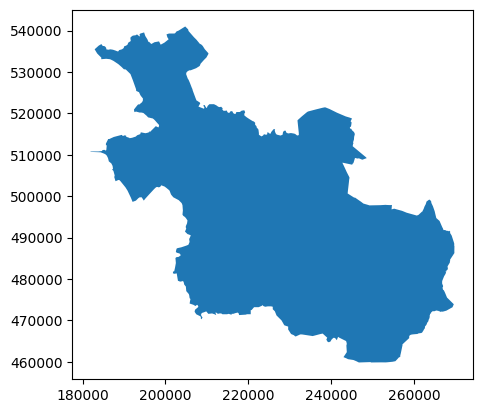

In [80]:
gdf_overijssel = gdf_nl_prov[gdf_nl_prov['NAME_1'] == 'Overijssel']
gdf_overijssel.plot()

## Spatial Operations

#### Buffer

Create buffer around a feature

<AxesSubplot: >

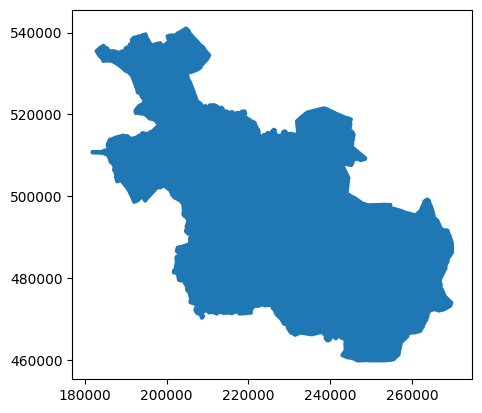

In [81]:
gdf_overijssel_buffer = gdf_overijssel.buffer(500)
gdf_overijssel_buffer.plot()

Save it to file

In [82]:
gdf_overijssel_buffer.to_file('overijssel_buffer.geojson', driver='GeoJSON')

### Intersection

Obtain Drenthe and Noord-Holland

<AxesSubplot: >

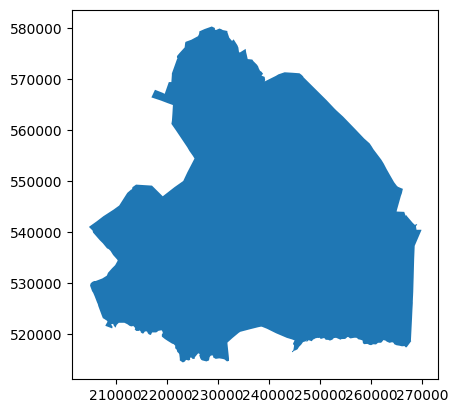

In [83]:
gdf_drenthe = gdf_nl_prov[gdf_nl_prov['NAME_1'] == 'Drenthe']
gdf_drenthe.plot()

<AxesSubplot: >

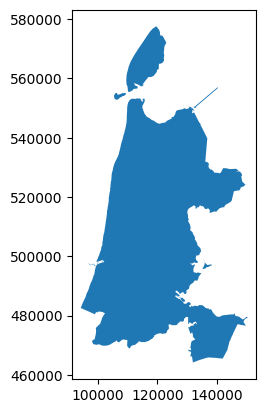

In [84]:
gdf_noordholland = gdf_nl_prov[gdf_nl_prov['NAME_1'] == 'Noord-Holland']
gdf_noordholland.plot()

Does the Overijssel buffer intersect Drenthe?

In [103]:
intersectsD = gdf_overijssel_buffer.intersects(gdf_drenthe.iloc[0]['geometry'])
print('Overrijssel buffer intersects Drenthe : ' + intersectsD.astype(str))

11    Overrijssel buffer intersects Drenthe : True
dtype: object


Intersection geometry

<AxesSubplot: >

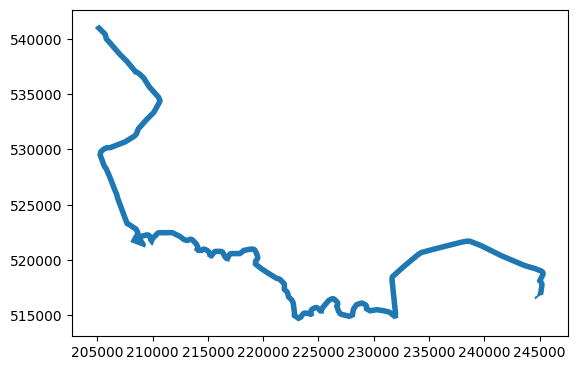

In [107]:
intersection = gdf_overijssel_buffer.intersection(gdf_drenthe.iloc[0]['geometry'])
intersection.plot()